In [23]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests

#import API key
from api_keys import geoapify_key


In [24]:
#load the csv file downloaded from Zillow Housing data into a DataFrame
MedianSalePrice_df = pd.read_csv("resources/Metro_median_sale_price_uc_sfr_sm_month.csv")

#Display sample data
MedianSalePrice_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,102001,0,United States,country,NaN,180194.0,183360.0,186694.0,189000.0,189000.0,...,344333.0,337667.0,331000.0,325667.0,326167.0,332833.0,342167.0,353333.0,363051.0,369384.0
1,394913,1,"New York, NY",msa,NY,404667.0,405333.0,408667.0,414000.0,420800.0,...,574667.0,558333.0,548333.0,545000.0,541667.0,541967.0,551300.0,571300.0,596000.0,616667.0
2,753899,2,"Los Angeles, CA",msa,CA,538833.0,530000.0,526167.0,512833.0,502167.0,...,876667.0,865667.0,854000.0,844000.0,840500.0,848833.0,860500.0,878000.0,894667.0,911333.0
3,394463,3,"Chicago, IL",msa,IL,233567.0,238400.0,243000.0,248000.0,250500.0,...,290833.0,284167.0,279167.0,276000.0,275667.0,283333.0,294000.0,307333.0,319250.0,326250.0
4,394514,4,"Dallas, TX",msa,TX,142692.0,147025.0,149692.0,153000.0,153000.0,...,393500.0,385833.0,376667.0,367333.0,366667.0,370000.0,380000.0,388333.0,400000.0,406667.0


In [25]:
#narrow down to median sales price in several California regions in year 2022
MedianSalePrice_CA_df = MedianSalePrice_df.loc[MedianSalePrice_df["StateName"] == "CA",["RegionName","2022-01-31","2022-02-28","2022-03-31","2022-04-30","2022-05-31","2022-06-30","2022-07-31","2022-08-31","2022-09-30","2022-10-31","2022-11-30","2022-12-31"]]
MedianSalePrice_CA_df

,RegionName,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
2,"Los Angeles, CA",857667.0,870083.0,887417.0,919083.0,940167.0,943500.0,926500.0,906333.0,888000.0,876667.0,865667.0,854000.0
12,"San Francisco, CA",1133333.0,1150000.0,1211667.0,1311667.0,1368333.0,1377667.0,1327667.0,1247667.0,1197333.0,1170667.0,1160667.0,1126429.0
13,"Riverside, CA",524167.0,531167.0,539833.0,553333.0,564667.0,571333.0,565000.0,556667.0,545000.0,538333.0,525000.0,516667.0
17,"San Diego, CA",808333.0,823333.0,848333.0,875333.0,898667.0,903667.0,890000.0,866667.0,852000.0,840333.0,825333.0,801667.0
26,"Sacramento, CA",548667.0,555000.0,573333.0,590417.0,603750.0,600417.0,595000.0,578333.0,568333.0,555000.0,548333.0,532667.0
35,"San Jose, CA",1475250.0,1511917.0,1580000.0,1650000.0,1680000.0,1652167.0,1585500.0,1523000.0,1479167.0,1455833.0,1451667.0,1405833.0
56,"Fresno, CA",375500.0,383333.0,389000.0,394417.0,397750.0,403750.0,403333.0,400000.0,394667.0,391833.0,390167.0,380332.0
62,"Bakersfield, CA",326167.0,328500.0,330333.0,337667.0,343667.0,348333.0,345000.0,344333.0,339333.0,341000.0,335583.0,333917.0
70,"Oxnard, CA",818417.0,823333.0,825000.0,851667.0,856667.0,866667.0,851667.0,836667.0,820000.0,801667.0,801667.0,792333.0
76,"Stockton, CA",508333.0,510000.0,527500.0,542667.0,556000.0,556000.0,540833.0,530833.0,518333.0,518500.0,513500.0,493000.0


In [26]:
#find out the top 5 most expensivie regions and their prices in December 2022

top_regions = MedianSalePrice_CA_df.sort_values(by='2022-12-31', ascending=False).head(5)

print(top_regions[['2022-12-31']])

     2022-12-31
35    1405833.0
178   1147000.0
12    1126429.0
2      854000.0
288    840833.0


In [27]:
#display the dataframe of the top 5 most expensive regions and display the 12 months prices of them
top_regions

,RegionName,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
35,"San Jose, CA",1475250.0,1511917.0,1580000.0,1650000.0,1680000.0,1652167.0,1585500.0,1523000.0,1479167.0,1455833.0,1451667.0,1405833.0
178,"Santa Cruz, CA",1078167.0,1103167.0,1231500.0,1304167.0,1315833.0,1253167.0,1202333.0,1192083.0,1165583.0,1206917.0,1193833.0,1147000.0
12,"San Francisco, CA",1133333.0,1150000.0,1211667.0,1311667.0,1368333.0,1377667.0,1327667.0,1247667.0,1197333.0,1170667.0,1160667.0,1126429.0
2,"Los Angeles, CA",857667.0,870083.0,887417.0,919083.0,940167.0,943500.0,926500.0,906333.0,888000.0,876667.0,865667.0,854000.0
288,"Napa, CA",807333.0,847667.0,881667.0,918333.0,893417.0,905417.0,899000.0,937750.0,926083.0,929167.0,887500.0,840833.0


In [28]:
#Use the region name as index
top_regions = top_regions.set_index('RegionName')
top_regions

,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
RegionName,,,,,,,,,,,,
"San Jose, CA",1475250.0,1511917.0,1580000.0,1650000.0,1680000.0,1652167.0,1585500.0,1523000.0,1479167.0,1455833.0,1451667.0,1405833.0
"Santa Cruz, CA",1078167.0,1103167.0,1231500.0,1304167.0,1315833.0,1253167.0,1202333.0,1192083.0,1165583.0,1206917.0,1193833.0,1147000.0
"San Francisco, CA",1133333.0,1150000.0,1211667.0,1311667.0,1368333.0,1377667.0,1327667.0,1247667.0,1197333.0,1170667.0,1160667.0,1126429.0
"Los Angeles, CA",857667.0,870083.0,887417.0,919083.0,940167.0,943500.0,926500.0,906333.0,888000.0,876667.0,865667.0,854000.0
"Napa, CA",807333.0,847667.0,881667.0,918333.0,893417.0,905417.0,899000.0,937750.0,926083.0,929167.0,887500.0,840833.0


In [29]:
#find out the top 5 regions in December 2022
top_regions_2022Dec=top_regions[['2022-12-31']]
top_regions_2022Dec

,2022-12-31
RegionName,
"San Jose, CA",1405833.0
"Santa Cruz, CA",1147000.0
"San Francisco, CA",1126429.0
"Los Angeles, CA",854000.0
"Napa, CA",840833.0


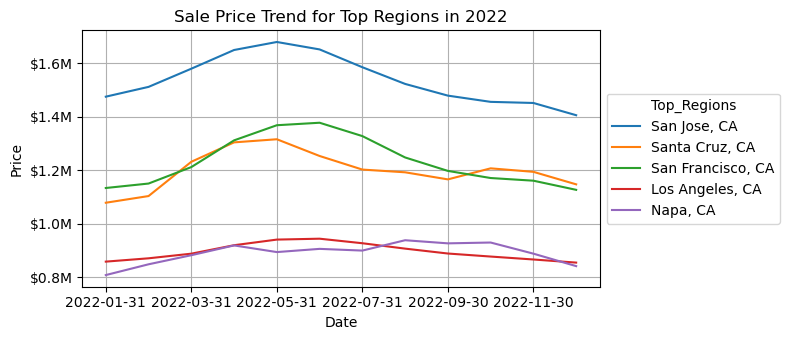

In [30]:
#use matplotlib to show the sale price trend for the above top 5 regions.

import matplotlib.pyplot as plt

plot_df = top_regions.transpose()

ax = plot_df.plot(figsize=(8, 3.5))

from matplotlib.ticker import FuncFormatter

def million_formatter(x, _):
    return f"${x / 1_000_000:.1f}M"

ax.yaxis.set_major_formatter(FuncFormatter(million_formatter))

ax.legend()
plt.title('Sale Price Trend for Top Regions in 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Top_Regions', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()





In [31]:
import requests

# Define a function named geocode_location that takes a location name as its parameter
def geocode_location(location_name):
    
    # Construct a request URL based on the location name, where geoapify_key is the API key for Geoapify
    url = f"https://api.geoapify.com/v1/geocode/search?text={location_name}&apiKey={geoapify_key}"
    response = requests.get(url)
    data = response.json()
    
    # If there's a 'features' key in the data and it's not empty, return the latitude and longitude coordinates of the location
    if data['features']:
        return data['features'][0]['geometry']['coordinates']
    else:
        return None

# Create a list of the above top 5 regions in California
locations = ["San Jose, California", 
             "Santa Cruz, California", 
             "San Francisco, California", 
             "Los Angeles, California", 
             "Napa, California"]

# Use list comprehension to get the latitude and longitude coordinates for each city name
coordinates = [geocode_location(location) for location in locations]


In [32]:
# Install the 'requests' and 'folium' libraries using pip
!pip install requests folium


In [33]:
# Import the folium library for map visualization
import folium

# Define a function to create a map with given coordinates
def create_map(coordinates):
    # Initialize a folium map centered at given lat-long (San Francisco) with a zoom level of 6
    m = folium.Map(location=[37.773972, -122.431297], zoom_start=6)
    
    # Iterate over the provided coordinates
    for coord in coordinates:
        if coord:  
            folium.Marker([coord[1], coord[0]]).add_to(m)  
# Return the created map
    return m

# Create the map using the 'coordinates' and store it in the variable 'map_'
map_ = create_map(coordinates)
map_


In [17]:
#get the median house hold income, population and unemployment rate for the top 5 regions
# resource: https://www.census.gov/quickfacts/fact/table/napacitycalifornia,losangelescitycalifo[…]ornia,santacruzcitycalifornia,sanjosecitycalifornia/PST045222

data = {
    'MedianHouseholdIncome': ['$125,075', "$96,217", "$126,187", "$69,778", "$92,700"],
    'Population': [971233, 61800, 808437, 3822238, 78315],
    'UnemploymentRate': ['2.4%', "5.0%", "2.2%", "4.5%", "3.0%"]
}

regions = ['San Jose, CA', "Santa Cruz, CA", "San Francisco, CA", "Los Angeles, CA", "Napa, CA"]

df = pd.DataFrame(data, index=regions)
df



,MedianHouseholdIncome,Population,UnemploymentRate
"San Jose, CA","$125,075",971233,2.4%
"Santa Cruz, CA","$96,217",61800,5.0%
"San Francisco, CA","$126,187",808437,2.2%
"Los Angeles, CA","$69,778",3822238,4.5%
"Napa, CA","$92,700",78315,3.0%


In [18]:
#merge the median sale prices of the top 5 regions in December and the median household income, population and unemployment 
merged_df = df.merge(top_regions_2022Dec, left_index=True, right_index=True)
merged_df

,MedianHouseholdIncome,Population,UnemploymentRate,2022-12-31
"San Jose, CA","$125,075",971233,2.4%,1405833.0
"Santa Cruz, CA","$96,217",61800,5.0%,1147000.0
"San Francisco, CA","$126,187",808437,2.2%,1126429.0
"Los Angeles, CA","$69,778",3822238,4.5%,854000.0
"Napa, CA","$92,700",78315,3.0%,840833.0


In [19]:
#updata the column name to median sale price in Dec 2022 to make the dataframe easier to read
merged_df.rename(columns={"2022-12-31": "MedianSalePrice_Dec2022"}, inplace=True)
merged_df

,MedianHouseholdIncome,Population,UnemploymentRate,MedianSalePrice_Dec2022
"San Jose, CA","$125,075",971233,2.4%,1405833.0
"Santa Cruz, CA","$96,217",61800,5.0%,1147000.0
"San Francisco, CA","$126,187",808437,2.2%,1126429.0
"Los Angeles, CA","$69,778",3822238,4.5%,854000.0
"Napa, CA","$92,700",78315,3.0%,840833.0


R squared: 0.6273240339988497


/var/folders/gj/_3jlnbzx3f72qvfy2r_dmt5h0000gp/T/ipykernel_1397/1948996882.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x_values = merged_df["MedianHouseholdIncome"].str.replace(',', '').str.replace('$', '').astype("float")


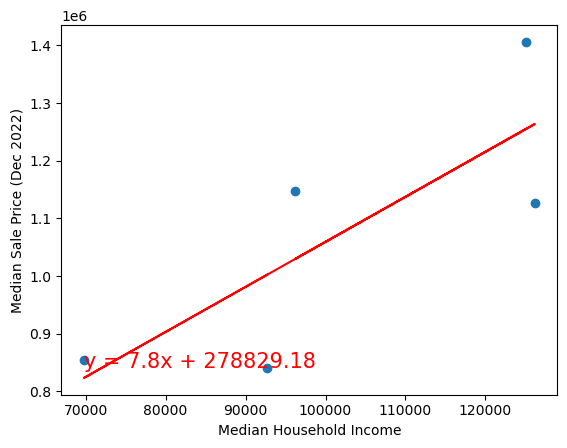

In [20]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Convert the columns to float by removing commas and dollar signs
x_values = merged_df["MedianHouseholdIncome"].str.replace(',', '').str.replace('$', '').astype("float")
y_values = merged_df["MedianSalePrice_Dec2022"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

# Label plot
plt.xlabel('Median Household Income')
plt.ylabel('Median Sale Price (Dec 2022)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()




R squared: 0.11509558184647722


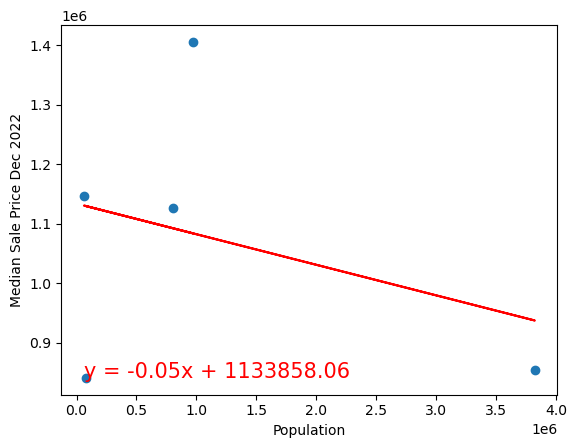

In [21]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming Population is already in float format
x_values = merged_df["Population"].astype("float")
y_values = merged_df["MedianSalePrice_Dec2022"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Label plot
plt.xlabel('Population')
plt.ylabel('Median Sale Price Dec 2022')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()


R squared: 0.12943971123858578


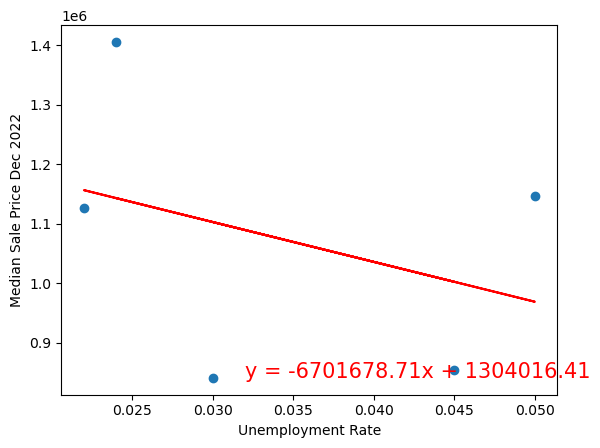

In [22]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming that the UnemploymentRate column has percentages like '2.4%'
# Convert it to float by removing the % and dividing by 100
merged_df['UnemploymentRate'] = merged_df['UnemploymentRate'].str.rstrip('%').astype('float') / 100.0

# Convert the MedianSalePrice_Dec2022 column to float (if it's not already)
y_values = merged_df["MedianSalePrice_Dec2022"].astype("float")
x_values = merged_df["UnemploymentRate"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values)+0.01, min(y_values)), fontsize=15, color="red")

# Label plot
plt.xlabel('Unemployment Rate')
plt.ylabel('Median Sale Price Dec 2022')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
